In [8]:
%matplotlib inline

import csv
import ternary
from bisect import bisect_left
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [9]:
import operator


In [11]:
def findClosest(myNumber,myList):
    """
    Assumes myList is sorted. Returns closest value to myNumber.

    If two numbers are equally close, return the smallest number.
    """
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        return float(myList[0])
    if pos == len(myList):
        return float(myList[-1])
    before = myList[pos - 1]
    after = myList[pos]
    if after - myNumber < myNumber - before:
       return float(after)
    else:
       return float(before)

options = range(0,101,1)

def generate_heatmap_values(indices):
    # indices = [i,j,k]
    
    # find closest value for each given the scaling I'm currently using
#     i = findClosest(indices[0]*100,options)
#     j = findClosest(indices[1]*100,options)
    
    # if scale by 1, can just do:
    i = round(indices[0]*100)
    j = round(indices[1]*100)
    k = 100.0-i-j
    
    if i ==0 and j==0 and k==0:
        return 0
    
    return d2[(i,j,k)]
    
generate_heatmap_values([0,0,100])

KeyError: (0, 0, 100.0)

In [104]:
def truncate(f, n):
    '''Truncates/pads a float f to n decimal places without rounding'''
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])

In [60]:
data = []

with open('alnizr_pred.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        r = row[0].split(' ')
        r[1] = float(r[1])*100
        r[3] = float(r[3])*100
        r[5] = float(r[5])*100
        r[6] = float(r[6])
        r[1] = float("{0:.1f}".format(r[1]))
        r[3] = float("{0:.1f}".format(r[3]))
        r[5] = float("{0:.1f}".format(r[5]))
        data.append(r)
        
d2 = {}
for row in data:
    d2[(row[1],row[3],row[5])] = 1-row[6]
    

In [7]:
exp = []

with open('../data/alnizr_exp.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        r = row[0].split(' ')
        r[1] = float(r[1])*100
        r[3] = float(r[3])*100
        r[5] = float(r[5])*100
        r[6] = float(r[6])
        r[1] = float("{0:.1f}".format(r[1]))
        r[3] = float("{0:.1f}".format(r[3]))
        r[5] = float("{0:.1f}".format(r[5]))
        exp.append(r)
        
d2 = {}
for row in data:
    d2[(row[1],row[3],row[5])] = 1-row[6]

NameError: name 'data' is not defined

In [48]:
d2
k = d2.keys()

stats = d2
ma = min(stats.iteritems(), key=operator.itemgetter(1))[0]
stats[ma]


0.118

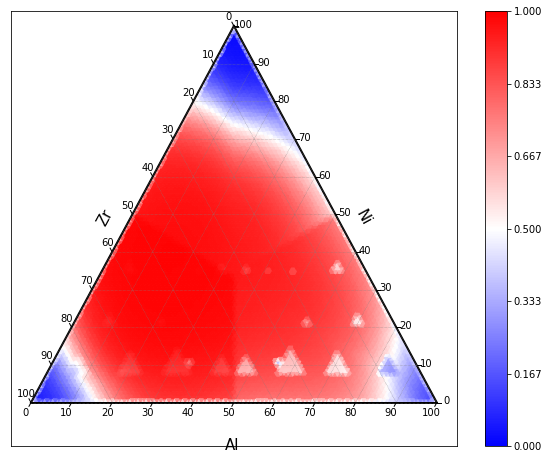

In [97]:
data = []

with open('../data/alnizr_pred_SVM.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        r = row[0].split(' ')
        r[1] = float(r[1])*100
        r[3] = float(r[3])*100
        r[5] = float(r[5])*100
        r[6] = float(r[6])
        r[1] = float("{0:.1f}".format(r[1]))
        r[3] = float("{0:.1f}".format(r[3]))
        r[5] = float("{0:.1f}".format(r[5]))
        data.append(r)
        
d2 = {}
for row in data:
    d2[(row[1],row[3],row[5])] = 1-row[6]

scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10,8)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=10,color="grey")
fontsize = 15
tax.left_axis_label("Zr", fontsize=fontsize)
tax.right_axis_label("Ni", fontsize=fontsize)
tax.bottom_axis_label("Al", fontsize=fontsize)

# tax.scatter(am,marker='o',color='blue',label = "AM")
# tax.scatter(ac,marker='s',color='green',label="AC")
# tax.scatter(cr,marker='x',color='red',label = "CR")

# tax.heatmap(d2,style='hexagonal',cmap = "viridis_r")
tax.heatmapf(generate_heatmap_values,style='triangular',
#              colorbar=False,
#              cmap = "viridis_r",vmin=0, vmax=1
             cmap = "bwr",vmin=0, vmax=1
            )
# cmap = "viridis_r"
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm._A = []
# plt.colorbar(sm,norm=norm)

# tax.boundary()

# tax.legend()
tax.ticks(axis='lbr', linewidth=1, multiple=10)
tax.clear_matplotlib_ticks()

figure.savefig("../plots/AlNiZr_SVM_pred.png",dpi=200)

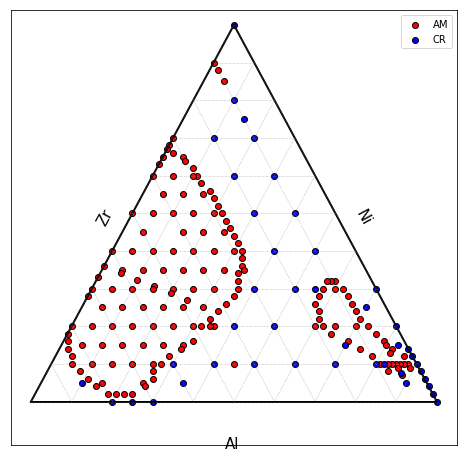

In [100]:
exp = []

# with open('CoVZr_hitp_1in4_exp.csv','r') as f:
#     reader = csv.reader(f)
#     for row in reader:
#         exp.append(row)
# exp = exp[1:]

with open('../data/alnizr_exp.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        r = row[0].split(' ')
        r[1] = float(r[1])*100
        r[3] = float(r[3])*100
        r[5] = float(r[5])*100
        r[6] = float(r[6])
        r[1] = float("{0:.1f}".format(r[1]))
        r[3] = float("{0:.1f}".format(r[3]))
        r[5] = float("{0:.1f}".format(r[5]))
        exp.append(r)

am = []
cr = []

for d in exp:
#     x = float(d[0]) # Co
#     y = float(d[1]) # V
#     z = float(d[2]) # Zr
#     d[3] = float(d[3])
    
    x = d[1]
    y = d[3]
    z = d[5]
    
    # order: bottom, right, left
    # order: Fe, Co, Zr
    
    if d[6] == 0:
        cr.append([x,y,z])
    else:
        am.append([x,y,z])
    
    
        
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(8,8)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=10,color="grey")
tax.left_axis_label("Zr", fontsize=fontsize)
tax.right_axis_label("Ni", fontsize=fontsize)
tax.bottom_axis_label("Al", fontsize=fontsize)

# tax.scatter(am,marker='o',color='blue',label = "AM")
# tax.scatter(ac,marker='s',color='green',label="AC")
# tax.scatter(cr,marker='x',color='red',label = "CR")

# tax.scatter(am,marker='o', edgecolor='white', linewidth='1', facecolor='#440254',label = "AM")
# # tax.scatter(ac,marker='s',edgecolor='black', linewidth='1',facecolor='green',label="AC")
# tax.scatter(cr,marker='o', edgecolor='black', linewidth='1', facecolor='yellow',label = "CR")

tax.scatter(am,marker='o', edgecolor='black', linewidth='1', facecolor='red',label = "AM")
# tax.scatter(ac,marker='s',edgecolor='black', linewidth='1',facecolor='green',label="AC")
tax.scatter(cr,marker='o', edgecolor='black', linewidth='1', facecolor='blue',label = "CR")


tax.legend()
# tax.ticks(axis='lbr', linewidth=1, multiple=10)
tax.clear_matplotlib_ticks()

figure.savefig("../plots/alnizr_exp.png",transparent=True,dpi=200)

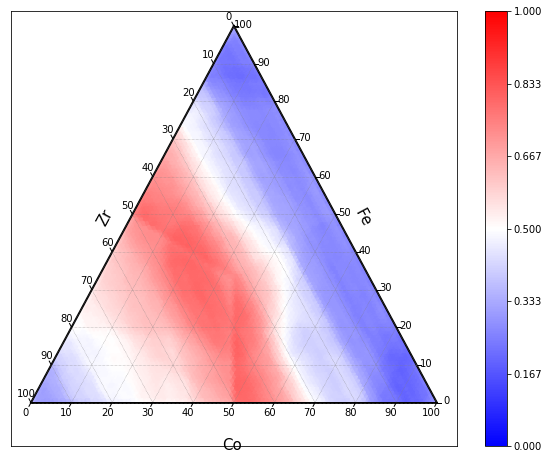

In [107]:
data = []

with open('../data/cofezr_pred_5percent.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        r = row[0].split(' ')
        r[1] = float(r[1])*100
        r[3] = float(r[3])*100
        r[5] = float(r[5])*100
        r[6] = float(r[6])
        r[1] = float("{0:.1f}".format(r[1]))
        r[3] = float("{0:.1f}".format(r[3]))
        r[5] = float("{0:.1f}".format(r[5]))
        data.append(r)
        
d2 = {}
for row in data:
    d2[(row[1],row[3],row[5])] = 1-row[6]

scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10,8)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=10,color="grey")
fontsize = 15
tax.left_axis_label("Zr", fontsize=fontsize)
tax.right_axis_label("Fe", fontsize=fontsize)
tax.bottom_axis_label("Co", fontsize=fontsize)

# tax.scatter(am,marker='o',color='blue',label = "AM")
# tax.scatter(ac,marker='s',color='green',label="AC")
# tax.scatter(cr,marker='x',color='red',label = "CR")

# tax.heatmap(d2,style='hexagonal',cmap = "viridis_r")
tax.heatmapf(generate_heatmap_values,style='triangular',
#              colorbar=False,
#              cmap = "viridis_r",vmin=0, vmax=1
             cmap = "bwr",vmin=0, vmax=1
            )
# cmap = "viridis_r"
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm._A = []
# plt.colorbar(sm,norm=norm)

# tax.boundary()

# tax.legend()
tax.ticks(axis='lbr', linewidth=1, multiple=10)
tax.clear_matplotlib_ticks()

figure.savefig("../plots/CoFeZr_RF_pred_5p.png")

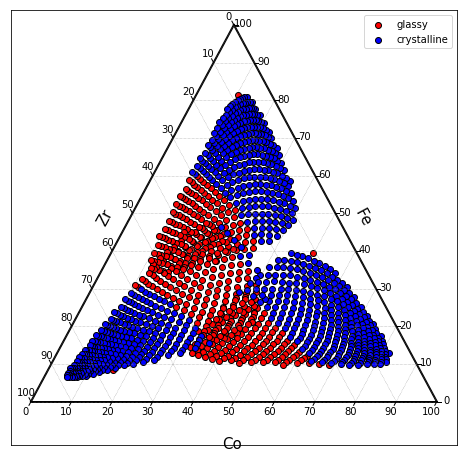

In [94]:
exp = []

# with open('CoVZr_hitp_1in4_exp.csv','r') as f:
#     reader = csv.reader(f)
#     for row in reader:
#         exp.append(row)
# exp = exp[1:]

with open('../data/cofezr_exp.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        r = row[0].split(' ')
        r[1] = float(r[1])*100
        r[3] = float(r[3])*100
        r[5] = float(r[5])*100
        r[6] = float(r[6])
        r[1] = float("{0:.1f}".format(r[1]))
        r[3] = float("{0:.1f}".format(r[3]))
        r[5] = float("{0:.1f}".format(r[5]))
        exp.append(r)

am = []
cr = []

# exp = exp[0::4]

for d in exp:
#     x = float(d[0]) # Co
#     y = float(d[1]) # V
#     z = float(d[2]) # Zr
#     d[3] = float(d[3])
    
    x = d[1]
    y = d[3]
    z = d[5]
    
    # order: bottom, right, left
    # order: Fe, Co, Zr
    
    if d[6] == 0:
        cr.append([x,y,z])
    else:
        am.append([x,y,z])
    
    
        
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(8,8)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=10,color="grey")
tax.left_axis_label("Zr", fontsize=fontsize)
tax.right_axis_label("Fe", fontsize=fontsize)
tax.bottom_axis_label("Co", fontsize=fontsize)

# tax.scatter(am,marker='o',color='blue',label = "AM")
# tax.scatter(ac,marker='s',color='green',label="AC")
# tax.scatter(cr,marker='x',color='red',label = "CR")

# tax.scatter(am,marker='o', edgecolor='white', linewidth='1', facecolor='#440254',label = "AM")
# # tax.scatter(ac,marker='s',edgecolor='black', linewidth='1',facecolor='green',label="AC")
# tax.scatter(cr,marker='o', edgecolor='black', linewidth='1', facecolor='yellow',label = "CR")

tax.scatter(am,marker='o', edgecolor='black', linewidth='1', facecolor='red',label = "glassy")
# tax.scatter(ac,marker='s',edgecolor='black', linewidth='1',facecolor='green',label="AC")
tax.scatter(cr,marker='o', edgecolor='black', linewidth='1', facecolor='blue',label = "crystalline")


tax.legend()
tax.ticks(axis='lbr', linewidth=1, multiple=10)
tax.clear_matplotlib_ticks()

figure.savefig("../plots/cofezr_exp_dense.pdf",transparent=True)

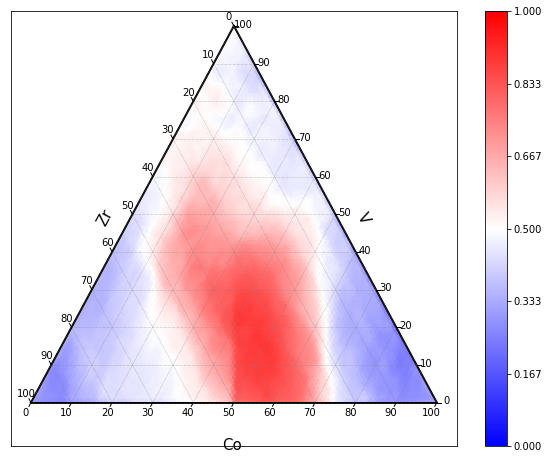

In [80]:
data = []

with open('../data/covzr_pred.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        r = row[0].split(' ')
        r[1] = float(r[1])*100
        r[3] = float(r[3])*100
        r[5] = float(r[5])*100
        r[6] = float(r[6])
        r[1] = float("{0:.1f}".format(r[1]))
        r[3] = float("{0:.1f}".format(r[3]))
        r[5] = float("{0:.1f}".format(r[5]))
        data.append(r)
        
d2 = {}
for row in data:
    d2[(row[1],row[3],row[5])] = 1-row[6]

scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10,8)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=10,color="grey")
fontsize = 15
tax.left_axis_label("Zr", fontsize=fontsize)
tax.right_axis_label("V", fontsize=fontsize)
tax.bottom_axis_label("Co", fontsize=fontsize)

# tax.scatter(am,marker='o',color='blue',label = "AM")
# tax.scatter(ac,marker='s',color='green',label="AC")
# tax.scatter(cr,marker='x',color='red',label = "CR")

# tax.heatmap(d2,style='hexagonal',cmap = "viridis_r")
tax.heatmapf(generate_heatmap_values,style='triangular',
#              colorbar=False,
#              cmap = "viridis_r",vmin=0, vmax=1
             cmap = "bwr",vmin=0, vmax=1
            )
# cmap = "viridis_r"
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm._A = []
# plt.colorbar(sm,norm=norm)

# tax.boundary()

# tax.legend()
tax.ticks(axis='lbr', linewidth=1, multiple=10)
tax.clear_matplotlib_ticks()

figure.savefig("../plots/CoVZr_RF_pred_half.png")

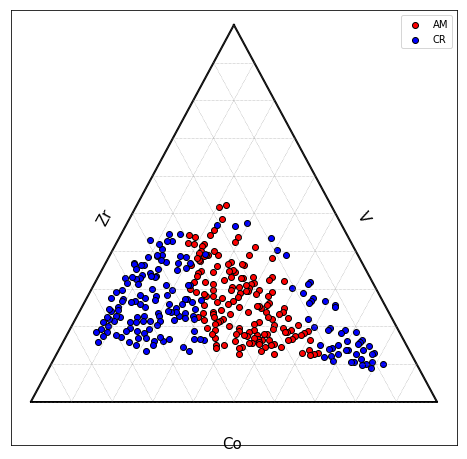

In [71]:
exp = []

# with open('CoVZr_hitp_1in4_exp.csv','r') as f:
#     reader = csv.reader(f)
#     for row in reader:
#         exp.append(row)
# exp = exp[1:]

with open('../data/covzr_exp.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        r = row[0].split(' ')
        r[1] = float(r[1])*100
        r[3] = float(r[3])*100
        r[5] = float(r[5])*100
        r[6] = float(r[6])
        r[1] = float("{0:.1f}".format(r[1]))
        r[3] = float("{0:.1f}".format(r[3]))
        r[5] = float("{0:.1f}".format(r[5]))
        exp.append(r)

am = []
cr = []

exp = exp[0::4]

for d in exp:
#     x = float(d[0]) # Co
#     y = float(d[1]) # V
#     z = float(d[2]) # Zr
#     d[3] = float(d[3])
    
    x = d[1]
    y = d[3]
    z = d[5]
    
    # order: bottom, right, left
    # order: Fe, Co, Zr
    
    if d[6] == 0:
        cr.append([x,y,z])
    else:
        am.append([x,y,z])
    
    
        
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(8,8)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=10,color="grey")
tax.left_axis_label("Zr", fontsize=fontsize)
tax.right_axis_label("V", fontsize=fontsize)
tax.bottom_axis_label("Co", fontsize=fontsize)

# tax.scatter(am,marker='o',color='blue',label = "AM")
# tax.scatter(ac,marker='s',color='green',label="AC")
# tax.scatter(cr,marker='x',color='red',label = "CR")

# tax.scatter(am,marker='o', edgecolor='white', linewidth='1', facecolor='#440254',label = "AM")
# # tax.scatter(ac,marker='s',edgecolor='black', linewidth='1',facecolor='green',label="AC")
# tax.scatter(cr,marker='o', edgecolor='black', linewidth='1', facecolor='yellow',label = "CR")

tax.scatter(am,marker='o', edgecolor='black', linewidth='1', facecolor='red',label = "AM")
# tax.scatter(ac,marker='s',edgecolor='black', linewidth='1',facecolor='green',label="AC")
tax.scatter(cr,marker='o', edgecolor='black', linewidth='1', facecolor='blue',label = "CR")


tax.legend()
# tax.ticks(axis='lbr', linewidth=1, multiple=10)
tax.clear_matplotlib_ticks()

figure.savefig("../plots/covzr_exp.png",transparent=True)

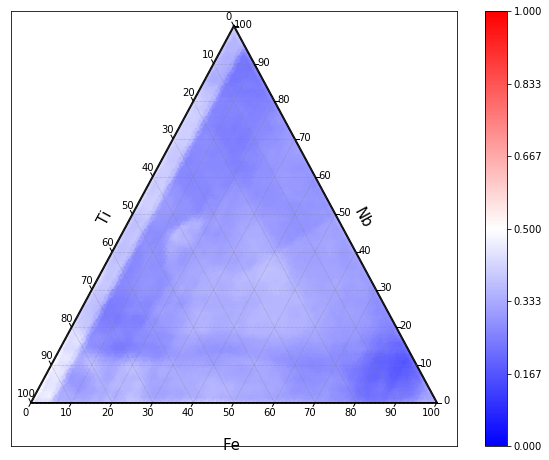

In [72]:
data = []

with open('../data/fenbti_pred.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        r = row[0].split(' ')
        r[1] = float(r[1])*100
        r[3] = float(r[3])*100
        r[5] = float(r[5])*100
        r[6] = float(r[6])
        r[1] = float("{0:.1f}".format(r[1]))
        r[3] = float("{0:.1f}".format(r[3]))
        r[5] = float("{0:.1f}".format(r[5]))
        data.append(r)
        
d2 = {}
for row in data:
    d2[(row[1],row[3],row[5])] = 1-row[6]

scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10,8)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=10,color="grey")
fontsize = 15
tax.left_axis_label("Ti", fontsize=fontsize)
tax.right_axis_label("Nb", fontsize=fontsize)
tax.bottom_axis_label("Fe", fontsize=fontsize)

# tax.scatter(am,marker='o',color='blue',label = "AM")
# tax.scatter(ac,marker='s',color='green',label="AC")
# tax.scatter(cr,marker='x',color='red',label = "CR")

# tax.heatmap(d2,style='hexagonal',cmap = "viridis_r")
tax.heatmapf(generate_heatmap_values,style='triangular',
#              colorbar=False,
#              cmap = "viridis_r",vmin=0, vmax=1
             cmap = "bwr",vmin=0, vmax=1
            )
# cmap = "viridis_r"
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm._A = []
# plt.colorbar(sm,norm=norm)

# tax.boundary()

# tax.legend()
tax.ticks(axis='lbr', linewidth=1, multiple=10)
tax.clear_matplotlib_ticks()

figure.savefig("../plots/FeNbTi_RF_pred.png")

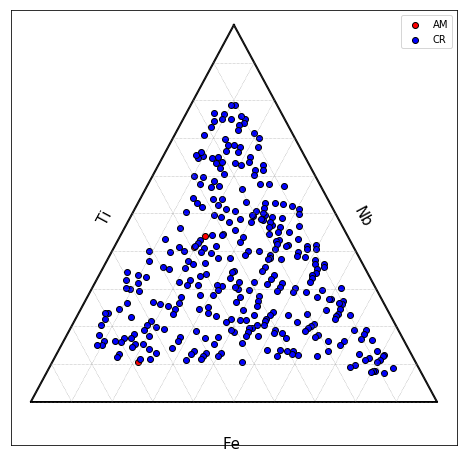

In [70]:
exp = []

# with open('CoVZr_hitp_1in4_exp.csv','r') as f:
#     reader = csv.reader(f)
#     for row in reader:
#         exp.append(row)
# exp = exp[1:]

with open('../data/fenbti_exp.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        r = row[0].split(' ')
        r[1] = float(r[1])*100
        r[3] = float(r[3])*100
        r[5] = float(r[5])*100
        r[6] = float(r[6])
        r[1] = float("{0:.1f}".format(r[1]))
        r[3] = float("{0:.1f}".format(r[3]))
        r[5] = float("{0:.1f}".format(r[5]))
        exp.append(r)

am = []
cr = []

exp = exp[0::4]

for d in exp:
#     x = float(d[0]) # Co
#     y = float(d[1]) # V
#     z = float(d[2]) # Zr
#     d[3] = float(d[3])
    
    x = d[1]
    y = d[3]
    z = d[5]
    
    # order: bottom, right, left
    # order: Fe, Co, Zr
    
    if d[6] == 0:
        cr.append([x,y,z])
    else:
        am.append([x,y,z])
    
    
        
scale = 100
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(8,8)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=10,color="grey")
tax.left_axis_label("Ti", fontsize=fontsize)
tax.right_axis_label("Nb", fontsize=fontsize)
tax.bottom_axis_label("Fe", fontsize=fontsize)

# tax.scatter(am,marker='o',color='blue',label = "AM")
# tax.scatter(ac,marker='s',color='green',label="AC")
# tax.scatter(cr,marker='x',color='red',label = "CR")

# tax.scatter(am,marker='o', edgecolor='white', linewidth='1', facecolor='#440254',label = "AM")
# # tax.scatter(ac,marker='s',edgecolor='black', linewidth='1',facecolor='green',label="AC")
# tax.scatter(cr,marker='o', edgecolor='black', linewidth='1', facecolor='yellow',label = "CR")

tax.scatter(am,marker='o', edgecolor='black', linewidth='1', facecolor='red',label = "AM")
# tax.scatter(ac,marker='s',edgecolor='black', linewidth='1',facecolor='green',label="AC")
tax.scatter(cr,marker='o', edgecolor='black', linewidth='1', facecolor='blue',label = "CR")


tax.legend()
# tax.ticks(axis='lbr', linewidth=1, multiple=10)
tax.clear_matplotlib_ticks()

figure.savefig("../plots/fenbti_exp.png",transparent=True)